In [1]:
#import packages and load Manhattan data set
import pandas as pd
import numpy

In [2]:
url2=(r'https://eu-gb.dataplatform.cloud.ibm.com/projects/55e6ff68-3758-4067-b126-55224d84f111/data-assets/43bda401-4323-4f1f-a20c-ba4a86685af4/preview?context=analytics&label=true')
a = ('manhattan_neigh.csv')
ab=pd.read_csv(a)
df_M=pd.DataFrame(ab)
df_M.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [3]:
#Add state info to neighborhoods
df_M.Neighborhood = df_M.Neighborhood + ', NY'
#value1="NY"
#df_M = df_M.append({'Neighborhood': value1}, ignore_index=True)
#df_M['Neighborhood'] = df_M['Neighborhood']+ ',NY'.astype(str)
df_M.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,"Marble Hill, NY",40.876551,-73.910660
1,Manhattan,"Chinatown, NY",40.715618,-73.994279
2,Manhattan,"Washington Heights, NY",40.851903,-73.936900
3,Manhattan,"Inwood, NY",40.867684,-73.921210
4,Manhattan,"Hamilton Heights, NY",40.823604,-73.949688


In [4]:
#delete unnecessary info from dataframe
df_M.drop('Borough',1,inplace=True)
df_M.head()

,Neighborhood,Latitude,Longitude
0,"Marble Hill, NY",40.876551,-73.910660
1,"Chinatown, NY",40.715618,-73.994279
2,"Washington Heights, NY",40.851903,-73.936900
3,"Inwood, NY",40.867684,-73.921210
4,"Hamilton Heights, NY",40.823604,-73.949688


In [5]:
#check size of dataframe
df_M.shape

(40, 3)

In [6]:
#Bring in the Boston dataframe
b = pd.read_csv('Boston_GPS2.csv',header=0,encoding = 'unicode_escape')
#cd=pd.read_csv(b)
df_B=pd.DataFrame(b)
df_B

,Neighborhood,Latitude,Longitude
0,Allston,42.352900,-71.132100
1,Black Bay,42.351294,-71.080356
2,Bay village,42.349100,-71.068000
3,Beacon Hill,42.358300,-71.066100
4,Brighton,42.350000,-71.160000
5,Charlestown,42.375278,-71.064444
6,Chinatown,42.350100,-71.060100
7,Dorchester,42.316667,-71.050000
8,Downtown,42.350000,-71.066667
9,East Boston,42.375000,-71.039167


In [7]:
#Change datatype in a column of dataframe

df_B['Longitude'] = pd.to_numeric(df_B['Longitude'], errors='coerce').fillna(0).astype(float)
df_B['Longitude'].dtype


dtype('float64')

In [8]:
#add state info to the Boston dataframe
df_B.Neighborhood = df_B.Neighborhood + ', MA'
df_B.head()

,Neighborhood,Latitude,Longitude
0,"Allston, MA",42.352900,-71.132100
1,"Black Bay, MA",42.351294,-71.080356
2,"Bay village, MA",42.349100,-71.068000
3,"Beacon Hill, MA",42.358300,-71.066100
4,"Brighton, MA",42.350000,-71.160000


In [9]:
#join two dataframes
df_comb=pd.concat([df_M,df_B],ignore_index=True)
#df_comb.reset_index()
df_comb.head()

,Neighborhood,Latitude,Longitude
0,"Marble Hill, NY",40.876551,-73.910660
1,"Chinatown, NY",40.715618,-73.994279
2,"Washington Heights, NY",40.851903,-73.936900
3,"Inwood, NY",40.867684,-73.921210
4,"Hamilton Heights, NY",40.823604,-73.949688


In [13]:
#Import packages to do the clustering
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


In [14]:
#Get the geographical location of Boston, MA
address = 'Boston, MA'

geolocator = Nominatim(user_agent="MA_explorer")
location = geolocator.geocode(address)
latitude1 = location.latitude
longitude1 = location.longitude
print('The geograpical coordinate of Boston, MA are {}, {}.'.format(latitude1, longitude1))

The geograpical coordinate of Boston, MA are 42.3602534, -71.0582912.


In [89]:
#Get the geographical location of Manhattan,NY
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="TR_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan,NY are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan,NY are 40.7896239, -73.9598939.


In [149]:
# create map of Boston using latitude and longitude values
#latitude=42.3600825
#longitude=-71.0588801
map_Boston = folium.Map(location=[latitude1, longitude1], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df_B['Latitude'], df_B['Longitude'], df_B['Neighborhood']):
    label = '{}'.format('Neighborhood')
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Boston)  
    
map_Boston

In [150]:
# create map of Manhattan using latitude and longitude values
#latitude=40.783060
#longitude=-73.971249
map_Manhattan = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df_M['Latitude'], df_M['Longitude'], df_M['Neighborhood']):
    label = '{}'.format('Neighborhood')
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Manhattan)  
    
map_Manhattan

In [151]:
#Define credentials
CLIENT_ID = 'JB0HVY3VNHI2RZOTM05BHQORQ0KK1L13JTEPWWOUQN5GGBHI' # your Foursquare ID
CLIENT_SECRET = 'KZWDD02NORXNHFM34B5TUBWGBXFYJIJOBHBZTBCXPZ3IZE51' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JB0HVY3VNHI2RZOTM05BHQORQ0KK1L13JTEPWWOUQN5GGBHI
CLIENT_SECRET:KZWDD02NORXNHFM34B5TUBWGBXFYJIJOBHBZTBCXPZ3IZE51


In [152]:
#Get data for the 1st neighbourhood
df_comb.loc[0, 'Neighborhood']

'Marble Hill, NY'

In [153]:
#Get the geographical coordinates of first neighborhood in dataframe-df5
neighborhood_latitude = df_comb.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_comb.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_comb.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill, NY are 40.87655077879964, -73.91065965862981.


In [154]:
#Create url to obtain top50 venues in "Marble Hill,NY" neighborhood of Manhattan
LIMIT = 50 # limit of number of venues returned by Foursquare API
#-->

#<!--
radius = 500 # define radius
#-->

#<!--
#\\ # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=JB0HVY3VNHI2RZOTM05BHQORQ0KK1L13JTEPWWOUQN5GGBHI&client_secret=KZWDD02NORXNHFM34B5TUBWGBXFYJIJOBHBZTBCXPZ3IZE51&v=20180604&ll=40.87655077879964,-73.91065965862981&radius=500&limit=50'

In [155]:
#send GET request to obtain results
results = requests.get('https://api.foursquare.com/v2/venues/explore?&client_id=JB0HVY3VNHI2RZOTM05BHQORQ0KK1L13JTEPWWOUQN5GGBHI&client_secret=KZWDD02NORXNHFM34B5TUBWGBXFYJIJOBHBZTBCXPZ3IZE51&v=20180604&ll=40.87655077879964,-73.91065965862981&radius=500&limit=50').json()
results

{'meta': {'code': 200, 'requestId': '5db8561ab9961d003800b345'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Marble Hill',
  'headerFullLocation': 'Marble Hill, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 25,
  'suggestedBounds': {'ne': {'lat': 40.88105078329964,
    'lng': -73.90471933917806},
   'sw': {'lat': 40.87205077429964, 'lng': -73.91659997808156}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b4429abf964a52037f225e3',
       'name': "Arturo's",
       'location': {'address': '5198 Broadway',
        'crossStreet': 'at 225th St.',
        'lat': 40.87441177110231,
        'lng': -73.91027100981574,
        'labeledLatLngs': [{'label'

In [156]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [157]:
#structure the pandas dataframe
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Arturo's,Pizza Place,40.874412,-73.910271
1,Bikram Yoga,Yoga Studio,40.876844,-73.906204
2,Tibbett Diner,Diner,40.880404,-73.908937
3,Starbucks,Coffee Shop,40.877531,-73.905582
4,Blink Fitness Riverdale,Gym,40.877147,-73.905837


In [158]:
#Find top 50 venues for all neighborhoods of both Manhattan,NY and Boston,MA
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
                
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [159]:
#Run the above function on each neighborhood
comb_venues = getNearbyVenues(names=df_comb['Neighborhood'],
                                   latitudes=df_comb['Latitude'],
                                   longitudes=df_comb['Longitude']
                                  )

Marble Hill, NY
Chinatown, NY
Washington Heights, NY
Inwood, NY
Hamilton Heights, NY
Manhattanville, NY
Central Harlem, NY
East Harlem, NY
Upper East Side, NY
Yorkville, NY
Lenox Hill, NY
Roosevelt Island, NY
Upper West Side, NY
Lincoln Square, NY
Clinton, NY
Midtown, NY
Murray Hill, NY
Chelsea, NY
Greenwich Village, NY
East Village, NY
Lower East Side, NY
Tribeca, NY
Little Italy, NY
Soho, NY
West Village, NY
Manhattan Valley, NY
Morningside Heights, NY
Gramercy, NY
Battery Park City, NY
Financial District, NY
Carnegie Hill, NY
Noho, NY
Civic Center, NY
Midtown South, NY
Sutton Place, NY
Turtle Bay, NY
Tudor City, NY
Stuyvesant Town, NY
Flatiron, NY
Hudson Yards, NY
Allston, MA
Black Bay, MA
Bay village, MA
Beacon Hill, MA
Brighton, MA
Charlestown, MA
Chinatown, MA
Dorchester, MA
Downtown, MA
East Boston, MA
Fenway Kenmore, MA
Hyde Park, MA
Jamaica Plain, MA
Mattapan, MA
Mission Hill, MA
North End, MA
Roslindale, MA
Roxbury, MA
South Boston, MA
South End, MA
West End, MA
West Roxbury,

In [160]:
#Examine the dataframe comb_venues
print(comb_venues.shape)
comb_venues.head()

(2668, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Marble Hill, NY",40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,"Marble Hill, NY",40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,"Marble Hill, NY",40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,"Marble Hill, NY",40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,"Marble Hill, NY",40.876551,-73.91066,Blink Fitness Riverdale,40.877147,-73.905837,Gym


In [161]:
#Find out how many unique categories are found
print('There are {} uniques categories.'.format(len(comb_venues['Venue Category'].unique())))

There are 313 uniques categories.


In [162]:
#Analyze each neighborhood on venue categories
# one hot encoding
comb_onehot = pd.get_dummies(comb_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
comb_onehot['Neighborhood'] = comb_venues['Neighborhood'] 

#Bring the neighborhood column to front
Neighborhood = comb_onehot['Neighborhood']
comb_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
comb_onehot.insert(0, 'Neighborhood', Neighborhood)
comb_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Cafeteria,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Leather Goods Store,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music School,Music Venue,Nail Salon,National Park,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Ski Shop,Smoke Shop,Smoothie Shop,Snack Place,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restauran

In [163]:
#Group rows by neighborhood_Find the mean of the frequency of each category
comb_grouped = comb_onehot.groupby('Neighborhood').mean().reset_index()
comb_grouped.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Cafeteria,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Leather Goods Store,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music School,Music Venue,Nail Salon,National Park,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Ski Shop,Smoke Shop,Smoothie Shop,Snack Place,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restauran

In [164]:
#find size of the dataframe with grouped data
comb_grouped.shape

(62, 313)

In [165]:
#Show each neighborhood with top5 most common venues
num_top_venues = 5

for hood in comb_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = comb_grouped[comb_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allston, MA----
                venue  freq
0   Korean Restaurant  0.12
1              Bakery  0.06
2  Chinese Restaurant  0.06
3    Sushi Restaurant  0.04
4                 Bar  0.04


----Battery Park City, NY----
           venue  freq
0    Coffee Shop  0.10
1           Park  0.08
2  Memorial Site  0.06
3   Cupcake Shop  0.04
4          Plaza  0.04


----Bay village, MA----
                venue  freq
0               Hotel  0.08
1  Seafood Restaurant  0.06
2      Sandwich Place  0.06
3             Theater  0.06
4          Steakhouse  0.06


----Beacon Hill, MA----
                venue  freq
0          Playground  0.06
1         Pizza Place  0.06
2  Italian Restaurant  0.06
3        Gourmet Shop  0.04
4           Gift Shop  0.04


----Black Bay, MA----
                 venue  freq
0   Seafood Restaurant  0.06
1       Ice Cream Shop  0.06
2  Sporting Goods Shop  0.06
3   Italian Restaurant  0.06
4   Salon / Barbershop  0.04


----Brighton, MA----
           venue  freq
0         

In [166]:
#Sort venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [315]:
#display top 10 venues for each neighborhood
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = comb_grouped['Neighborhood']

for ind in np.arange(comb_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(comb_grouped.iloc[ind, :], num_top_venues)
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Allston, MA",Korean Restaurant,Bakery,Chinese Restaurant,Fried Chicken Joint,Bar,Sushi Restaurant,Liquor Store,Mexican Restaurant,Rock Club,Sandwich Place
1,"Battery Park City, NY",Coffee Shop,Park,Memorial Site,Plaza,Food Court,Cupcake Shop,BBQ Joint,Sandwich Place,Grocery Store,Ice Cream Shop
2,"Bay village, MA",Hotel,Steakhouse,Sandwich Place,Theater,Seafood Restaurant,Performing Arts Venue,French Restaurant,Bakery,American Restaurant,Italian Restaurant
3,"Beacon Hill, MA",Playground,Italian Restaurant,Pizza Place,Gift Shop,Hotel,French Restaurant,Gourmet Shop,Other Repair Shop,Outdoor Sculpture,Park
4,"Black Bay, MA",Ice Cream Shop,Sporting Goods Shop,Seafood Restaurant,Italian Restaurant,Plaza,Salad Place,Chocolate Shop,Salon / Barbershop,Hotel,Cosmetics Shop


In [323]:
#run k means to cluster the neighborhoods upto 5  clusters
# set number of clusters
kclusters = 5

comb_grouped_clustering = comb_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(comb_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 2, 2, 1, 1, 1, 1, 1, 1], dtype=int32)

In [394]:
#Create dataframe with new clusters and top10 venues for each neighborhood 
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

comb_merged = df_comb

# merge comb_grouped with df_comb to add latitude/longitude for each neighborhood
comb_merged = comb_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

comb_merged.tail() # check the last columns!


,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,"Roxbury, MA",42.325000,-71.095278,1,Park,Art Gallery,Rental Car Location,Metro Station,Furniture / Home Store,Gym,Plaza,Field,Ethiopian Restaurant,Dumpling Restaurant
58,"South Boston, MA",42.336111,-71.045833,1,Coffee Shop,Pizza Place,Bar,Gym,Sports Bar,Italian Restaurant,ATM,New American Restaurant,Liquor Store,Gas Station
59,"South End, MA",42.343850,-71.071864,1,Wine Bar,American Restaurant,Gastropub,Café,Wine Shop,Mexican Restaurant,Gift Shop,Dog Run,Park,Italian Restaurant
60,"West End, MA",42.364758,-71.067421,2,Science Museum,Hotel Bar,American Restaurant,Bar,Hotel,Pizza Place,Italian Restaurant,Mexican Restaurant,French Restaurant,Yoga Studio
61,"West Roxbury, MA",42.279167,-71.149444,0,Outdoors & Recreation,Lawyer,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space


In [395]:
InteractiveShell.ast_node_interactivity = "last_expr"

In [396]:
#Show clusters on map
# create map
latitude3=37.0902
longitude3=-95.7129
map_clusters = folium.Map(location=[latitude3, longitude3], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(comb_merged['Latitude'], comb_merged['Longitude'], comb_merged['Neighborhood'], comb_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [397]:
#Show clusters on map_Boston, MA
# create map
map_clusters = folium.Map(location=[latitude1, longitude1], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(comb_merged['Latitude'], comb_merged['Longitude'], comb_merged['Neighborhood'], comb_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [398]:
#Show clusters on map_Manhattan, NY
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(comb_merged['Latitude'], comb_merged['Longitude'], comb_merged['Neighborhood'], comb_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [329]:
#Show details of cluster 0
cl_0=comb_merged.loc[comb_merged['Cluster Labels'] == 0,comb_merged.columns[[0] + list(range(4, comb_merged.shape[1]))]]
cl_0.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
61,"West Roxbury, MA",Outdoors & Recreation,Lawyer,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space


In [330]:
#Show details 
cl_1=comb_merged.loc[comb_merged['Cluster Labels'] == 1,comb_merged.columns[[0] + list(range(4, comb_merged.shape[1]))]]
cl_1

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Marble Hill, NY",Coffee Shop,Sandwich Place,Yoga Studio,Deli / Bodega,Donut Shop,Bank,Tennis Stadium,Big Box Store,Supplement Shop,Discount Store
1,"Chinatown, NY",Chinese Restaurant,Cocktail Bar,Sandwich Place,Salon / Barbershop,American Restaurant,Noodle House,Hotpot Restaurant,Ice Cream Shop,Spa,Asian Restaurant
2,"Washington Heights, NY",Park,Coffee Shop,Bakery,Mobile Phone Shop,Grocery Store,Café,Latin American Restaurant,New American Restaurant,Tapas Restaurant,Wine Shop
3,"Inwood, NY",Mexican Restaurant,Café,Pizza Place,Frozen Yogurt Shop,Spanish Restaurant,Bakery,Chinese Restaurant,Restaurant,American Restaurant,Lounge
4,"Hamilton Heights, NY",Mexican Restaurant,Café,Deli / Bodega,Coffee Shop,Yoga Studio,Caribbean Restaurant,Sushi Restaurant,School,Bakery,Indian Restaurant
5,"Manhattanville, NY",Seafood Restaurant,Coffee Shop,Park,Mexican Restaurant,Fried Chicken Joint,Sushi Restaurant,Italian Restaurant,Deli / Bodega,Indian Restaurant,Ramen Restaurant
6,"Central Harlem, NY",Chinese Restaurant,African Restaurant,Fried Chicken Joint,Art Gallery,French Restaurant,Bar,Seafood Restaurant,American Restaurant,Dessert Shop,Boutique
7,"East Harlem, NY",Mexican Restaurant,Thai Restaurant,Bakery,Deli / Bodega,Latin American Restaurant,Spanish Restaurant,Café,Beer Bar,Taco Place,French Restaurant
9,"Yorkville, NY",Italian Restaurant,Gym,Coffee Shop,Deli / Bodega,Park,Bar,Pizza Place,Wine Shop,Sandwich Place,Liquor Store
10,"Lenox Hill, NY",Gym,Gym / Fitness Center,Burger Joint,Turkish Restaurant,Cycle Studio,Wine Shop,Bakery,Coffee Shop,Thai Restaurant,Gift Shop


In [331]:
#Show details 
cl_2=comb_merged.loc[comb_merged['Cluster Labels'] == 2,comb_merged.columns[[0] + list(range(4, comb_merged.shape[1]))]]
cl_2

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,"Upper East Side, NY",Italian Restaurant,Hotel,Bakery,American Restaurant,Art Gallery,Gym / Fitness Center,French Restaurant,Boutique,Bookstore,Plaza
13,"Lincoln Square, NY",Theater,Plaza,Indie Movie Theater,Concert Hall,Performing Arts Venue,Gym / Fitness Center,Gym,American Restaurant,Park,Opera House
14,"Clinton, NY",Theater,Gym / Fitness Center,Wine Shop,American Restaurant,Lounge,Hotel,Peruvian Restaurant,Mediterranean Restaurant,Sandwich Place,Gift Shop
33,"Midtown South, NY",Korean Restaurant,Coffee Shop,Cosmetics Shop,Fried Chicken Joint,Hotel,Hotel Bar,Lingerie Store,Grocery Store,Cocktail Bar,Gym
37,"Stuyvesant Town, NY",Playground,Park,Boat or Ferry,Bar,Harbor / Marina,Pet Service,Cocktail Bar,Farmers Market,Fountain,Bistro
42,"Bay village, MA",Hotel,Steakhouse,Sandwich Place,Theater,Seafood Restaurant,Performing Arts Venue,French Restaurant,Bakery,American Restaurant,Italian Restaurant
43,"Beacon Hill, MA",Playground,Italian Restaurant,Pizza Place,Gift Shop,Hotel,French Restaurant,Gourmet Shop,Other Repair Shop,Outdoor Sculpture,Park
48,"Downtown, MA",Hotel,Seafood Restaurant,Theater,Steakhouse,Italian Restaurant,Performing Arts Venue,Spa,Sandwich Place,Pizza Place,Sushi Restaurant
51,"Hyde Park, MA",American Restaurant,Pizza Place,Ice Cream Shop,Pharmacy,Grocery Store,Gym,Theater,Donut Shop,Discount Store,Bar
60,"West End, MA",Science Museum,Hotel Bar,American Restaurant,Bar,Hotel,Pizza Place,Italian Restaurant,Mexican Restaurant,French Restaurant,Yoga Studio


In [332]:
#Show details 
cl_3=comb_merged.loc[comb_merged['Cluster Labels'] == 3,comb_merged.columns[[0] + list(range(4, comb_merged.shape[1]))]]
cl_3

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,"Greenwich Village, NY",Italian Restaurant,Clothing Store,Sushi Restaurant,French Restaurant,Cosmetics Shop,Café,Gourmet Shop,Seafood Restaurant,Record Shop,Rock Club
24,"West Village, NY",Italian Restaurant,Cosmetics Shop,Cocktail Bar,Bakery,Chinese Restaurant,Gourmet Shop,Coffee Shop,Wine Bar,American Restaurant,New American Restaurant
55,"North End, MA",Italian Restaurant,Pizza Place,Bakery,Park,Café,Seafood Restaurant,Sandwich Place,Outdoor Sculpture,Nail Salon,Cemetery


In [333]:
#Show details 
cl_4=comb_merged.loc[comb_merged['Cluster Labels'] == 4,comb_merged.columns[[0] + list(range(4, comb_merged.shape[1]))]]
cl_4

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
53,"Mattapan, MA",Trail,Home Service,Business Service,Yoga Studio,Event Space,Dumpling Restaurant,Duty-free Shop,Electronics Store,Empanada Restaurant,English Restaurant


In [334]:
#Show details 
cl_5=comb_merged.loc[comb_merged['Cluster Labels'] == 5,comb_merged.columns[[0] + list(range(4, comb_merged.shape[1]))]]
cl_5

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [335]:
cl_1['Neighborhood'].head
print(cl_1['Neighborhood'].shape)

<bound method NDFrame.head of 0             Marble Hill, NY
1               Chinatown, NY
2      Washington Heights, NY
3                  Inwood, NY
4        Hamilton Heights, NY
5          Manhattanville, NY
6          Central Harlem, NY
7             East Harlem, NY
9               Yorkville, NY
10             Lenox Hill, NY
11       Roosevelt Island, NY
12        Upper West Side, NY
15                Midtown, NY
16            Murray Hill, NY
17                Chelsea, NY
19           East Village, NY
20        Lower East Side, NY
21                Tribeca, NY
22           Little Italy, NY
23                   Soho, NY
25       Manhattan Valley, NY
26    Morningside Heights, NY
27               Gramercy, NY
28      Battery Park City, NY
29     Financial District, NY
30          Carnegie Hill, NY
31                   Noho, NY
32           Civic Center, NY
34           Sutton Place, NY
35             Turtle Bay, NY
36             Tudor City, NY
38               Flatiron, NY
39        

(47,)


In [336]:
#Boston rent dataframe
Br = pd.read_csv('Boston_rent.csv',encoding = 'unicode_escape')
#cd=pd.read_csv(b)
df_Br=pd.DataFrame(Br)
#df_Br.rename(columns={0:'Neighborhood', 1:'Income'}, inplace=True)
df_Br.head()

,Neighborhood,Rent
0,Allston,"2,865"
1,Back Bay,"3,843"
2,Bay Village,"3,783"
3,Beacon Hill,"3,647"
4,Charlestown,"3,289"


In [337]:
#Add the State ('MA') info to the neighbohood names
Br.Neighborhood = Br.Neighborhood + ', MA'
Br.head()

,Neighborhood,Rent
0,"Allston, MA","2,865"
1,"Back Bay, MA","3,843"
2,"Bay Village, MA","3,783"
3,"Beacon Hill, MA","3,647"
4,"Charlestown, MA","3,289"


In [338]:
#Boston income dataframe
BI = pd.read_csv('Boston_income2.csv',encoding = 'unicode_escape')
#cd=pd.read_csv(b)
df_BI=pd.DataFrame(BI)
df_BI.rename(columns={0:'Neighborhood', 1:'Income'}, inplace=True)
df_BI.head()

,Neighborhood,Income
0,Allston,"55,752.00"
1,Back bay,"55,777.00"
2,Bay View,"103,164.00"
3,Beacon Hill,"93,133.00"
4,Brighton,"55,530.00"


In [339]:
#Add the State ('MA') info to the neighbohood names
BI.Neighborhood = BI.Neighborhood + ', MA'
BI.head()

,Neighborhood,Income
0,"Allston, MA","55,752.00"
1,"Back bay, MA","55,777.00"
2,"Bay View, MA","103,164.00"
3,"Beacon Hill, MA","93,133.00"
4,"Brighton, MA","55,530.00"


In [340]:
#Manhattan rent dataframe
Mr = pd.read_csv('Manhattan_rent.csv',encoding = 'unicode_escape')
df_Mr=pd.DataFrame(Mr)
df_Mr.head()

,Neighborhood,Rent
0,Battery Park City,"4,553"
1,Carnegie Hill,"3,555"
2,Central Harlem,"2,300"
3,Central Harlem,"3,000"
4,Chelsea,"4,304"


In [341]:
#Add the State ('NY') info to the neighbohood names
Mr.Neighborhood = Mr.Neighborhood + ', NY'
Mr.head()

,Neighborhood,Rent
0,"Battery Park City, NY","4,553"
1,"Carnegie Hill, NY","3,555"
2,"Central Harlem, NY","2,300"
3,"Central Harlem, NY","3,000"
4,"Chelsea, NY","4,304"


In [342]:
#Manhattan income dataframe
MI = pd.read_csv('Manhattan_income.csv',encoding = 'unicode_escape')
df_MI=pd.DataFrame(MI)
df_MI.head()

,Neighborhood,Income
0,Battery Park City,"125,434"
1,Carnegie Hill,"155,213"
2,Central Harlem,"34,413"
3,Chelsea,"101,369"
4,Chinatown,"35,908"


In [343]:
#Add the State ('NY') info to the neighbohood names
MI.Neighborhood = MI.Neighborhood + ', NY'
MI.head()

,Neighborhood,Income
0,"Battery Park City, NY","125,434"
1,"Carnegie Hill, NY","155,213"
2,"Central Harlem, NY","34,413"
3,"Chelsea, NY","101,369"
4,"Chinatown, NY","35,908"


In [344]:
#Combine the Manhattan and Boston rent dataframes
comb_rent=pd.concat([Mr,Br],ignore_index=True)
#df_comb.reset_index()
comb_rent.head()

,Neighborhood,Rent
0,"Battery Park City, NY","4,553"
1,"Carnegie Hill, NY","3,555"
2,"Central Harlem, NY","2,300"
3,"Central Harlem, NY","3,000"
4,"Chelsea, NY","4,304"


In [345]:
#Change the rent column of the combined rent dataframe to float64 datatype
comb_rent['Rent'] = pd.to_numeric(comb_rent['Rent'], errors='coerce').fillna(0).astype(float)
comb_rent['Rent'].dtype

dtype('float64')

In [346]:
#evaluate if rent dat can yield distinct clusters
# import k-means from clustering stage
from sklearn.cluster import KMeans
kclusters = 4

comb_rent_clustering = comb_rent.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(comb_rent_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [347]:
#import Boston neighborhood income and rent statistics into a dataframe
BIR = pd.read_csv('Boston_income2_rent.csv',encoding = 'unicode_escape')
df_BIR=pd.DataFrame(BIR)

df_BIR.Neighborhood = df_BIR.Neighborhood + ', MA'

df_BIR.head()
df_BIR['Income'].dtype

,Neighborhood,Income,Rent
0,"Allston, MA",55752,2865
1,"Back bay, MA",55777,3843
2,"Bay View, MA",103164,3783
3,"Beacon Hill, MA",93133,3647
4,"Brighton, MA",55530,2171


dtype('int64')

In [348]:
#import Manhattan neighborhood income and rent statistics into a dataframe
MIR = pd.read_csv('Manhattan_income_rent.csv',encoding = 'unicode_escape')
df_MIR=pd.DataFrame(MIR)

df_MIR.Neighborhood = df_MIR.Neighborhood + ', NY'

df_MIR.head()

,Neighborhood,Income,Rent
0,"Battery Park City, NY",125434,4553
1,"Carnegie Hill, NY",155213,3555
2,"Central Harlem, NY",34413,2300
3,"Chelsea, NY",101369,4304
4,"Chinatown, NY",35908,3391


In [349]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [350]:
#join two dataframes
df_comb_IR=pd.concat([df_MIR,df_BIR],ignore_index=True)
#df_comb.reset_index()
df_comb_IR=pd.DataFrame(df_comb_IR)
df_comb_IR.shape
df_comb_IR.head()
df_comb_IR['Income'].dtype

(56, 3)

,Neighborhood,Income,Rent
0,"Battery Park City, NY",125434,4553
1,"Carnegie Hill, NY",155213,3555
2,"Central Harlem, NY",34413,2300
3,"Chelsea, NY",101369,4304
4,"Chinatown, NY",35908,3391


dtype('int64')

In [384]:

#Merge Income, Rent info with comb_merge dataframe
comb_merged_IR= pd.merge(comb_merged, df_comb_IR, on="Neighborhood")
comb_merged_IR.head()
comb_merged_IR.shape

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Income,Rent
0,"Marble Hill, NY",40.876551,-73.910660,1,Coffee Shop,Sandwich Place,Yoga Studio,Deli / Bodega,Donut Shop,Bank,Tennis Stadium,Big Box Store,Supplement Shop,Discount Store,39003,2200
1,"Chinatown, NY",40.715618,-73.994279,1,Chinese Restaurant,Cocktail Bar,Sandwich Place,Salon / Barbershop,American Restaurant,Noodle House,Hotpot Restaurant,Ice Cream Shop,Spa,Asian Restaurant,35908,3391
2,"Washington Heights, NY",40.851903,-73.936900,1,Park,Coffee Shop,Bakery,Mobile Phone Shop,Grocery Store,Café,Latin American Restaurant,New American Restaurant,Tapas Restaurant,Wine Shop,43355,2295
3,"Inwood, NY",40.867684,-73.921210,1,Mexican Restaurant,Café,Pizza Place,Frozen Yogurt Shop,Spanish Restaurant,Bakery,Chinese Restaurant,Restaurant,American Restaurant,Lounge,39003,2200
4,"Hamilton Heights, NY",40.823604,-73.949688,1,Mexican Restaurant,Café,Deli / Bodega,Coffee Shop,Yoga Studio,Caribbean Restaurant,Sushi Restaurant,School,Bakery,Indian Restaurant,39019,2495


(51, 16)

**Merge income and rent info with the cluster specific dataframes_for all 5 clusters separately.  Also extract out the cluster neighborhood info for reportings.**

In [378]:

cl_0_IR= pd.merge(cl_0, df_comb_IR, on="Neighborhood")
cl_0_IR.head()
a=pd.DataFrame(cl_0_IR['Neighborhood'])
a

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Income,Rent
0,"West Roxbury, MA",Outdoors & Recreation,Lawyer,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,89072,1966


,Neighborhood
0,"West Roxbury, MA"


In [387]:
cl_1_IR= pd.merge(cl_1, df_comb_IR, on="Neighborhood")
cl_1_IR.head(10)
b=pd.DataFrame(cl_1_IR['Neighborhood'])
b

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Income,Rent
0,"Marble Hill, NY",Coffee Shop,Sandwich Place,Yoga Studio,Deli / Bodega,Donut Shop,Bank,Tennis Stadium,Big Box Store,Supplement Shop,Discount Store,39003,2200
1,"Chinatown, NY",Chinese Restaurant,Cocktail Bar,Sandwich Place,Salon / Barbershop,American Restaurant,Noodle House,Hotpot Restaurant,Ice Cream Shop,Spa,Asian Restaurant,35908,3391
2,"Washington Heights, NY",Park,Coffee Shop,Bakery,Mobile Phone Shop,Grocery Store,Café,Latin American Restaurant,New American Restaurant,Tapas Restaurant,Wine Shop,43355,2295
3,"Inwood, NY",Mexican Restaurant,Café,Pizza Place,Frozen Yogurt Shop,Spanish Restaurant,Bakery,Chinese Restaurant,Restaurant,American Restaurant,Lounge,39003,2200
4,"Hamilton Heights, NY",Mexican Restaurant,Café,Deli / Bodega,Coffee Shop,Yoga Studio,Caribbean Restaurant,Sushi Restaurant,School,Bakery,Indian Restaurant,39019,2495
5,"Manhattanville, NY",Seafood Restaurant,Coffee Shop,Park,Mexican Restaurant,Fried Chicken Joint,Sushi Restaurant,Italian Restaurant,Deli / Bodega,Indian Restaurant,Ramen Restaurant,29182,2550
6,"Central Harlem, NY",Chinese Restaurant,African Restaurant,Fried Chicken Joint,Art Gallery,French Restaurant,Bar,Seafood Restaurant,American Restaurant,Dessert Shop,Boutique,34413,2300
7,"East Harlem, NY",Mexican Restaurant,Thai Restaurant,Bakery,Deli / Bodega,Latin American Restaurant,Spanish Restaurant,Café,Beer Bar,Taco Place,French Restaurant,30978,2850
8,"Yorkville, NY",Italian Restaurant,Gym,Coffee Shop,Deli / Bodega,Park,Bar,Pizza Place,Wine Shop,Sandwich Place,Liquor Store,98840,3250
9,"Lenox Hill, NY",Gym,Gym / Fitness Center,Burger Joint,Turkish Restaurant,Cycle Studio,Wine Shop,Bakery,Coffee Shop,Thai Restaurant,Gift Shop,98797,3395


,Neighborhood
0,"Marble Hill, NY"
1,"Chinatown, NY"
2,"Washington Heights, NY"
3,"Inwood, NY"
4,"Hamilton Heights, NY"
5,"Manhattanville, NY"
6,"Central Harlem, NY"
7,"East Harlem, NY"
8,"Yorkville, NY"
9,"Lenox Hill, NY"


In [386]:
cl_2_IR= pd.merge(cl_2, df_comb_IR, on="Neighborhood")
cl_2_IR
c=pd.DataFrame(cl_2_IR['Neighborhood'])
c

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Income,Rent
0,"Upper East Side, NY",Italian Restaurant,Hotel,Bakery,American Restaurant,Art Gallery,Gym / Fitness Center,French Restaurant,Boutique,Bookstore,Plaza,155213,3555
1,"Lincoln Square, NY",Theater,Plaza,Indie Movie Theater,Concert Hall,Performing Arts Venue,Gym / Fitness Center,Gym,American Restaurant,Park,Opera House,120337,5233
2,"Clinton, NY",Theater,Gym / Fitness Center,Wine Shop,American Restaurant,Lounge,Hotel,Peruvian Restaurant,Mediterranean Restaurant,Sandwich Place,Gift Shop,73591,3600
3,"Midtown South, NY",Korean Restaurant,Coffee Shop,Cosmetics Shop,Fried Chicken Joint,Hotel,Hotel Bar,Lingerie Store,Grocery Store,Cocktail Bar,Gym,114491,3950
4,"Stuyvesant Town, NY",Playground,Park,Boat or Ferry,Bar,Harbor / Marina,Pet Service,Cocktail Bar,Farmers Market,Fountain,Bistro,95022,4257
5,"Beacon Hill, MA",Playground,Italian Restaurant,Pizza Place,Gift Shop,Hotel,French Restaurant,Gourmet Shop,Other Repair Shop,Outdoor Sculpture,Park,93133,3647
6,"Downtown, MA",Hotel,Seafood Restaurant,Theater,Steakhouse,Italian Restaurant,Performing Arts Venue,Spa,Sandwich Place,Pizza Place,Sushi Restaurant,88233,3810
7,"Hyde Park, MA",American Restaurant,Pizza Place,Ice Cream Shop,Pharmacy,Grocery Store,Gym,Theater,Donut Shop,Discount Store,Bar,63651,1665
8,"West End, MA",Science Museum,Hotel Bar,American Restaurant,Bar,Hotel,Pizza Place,Italian Restaurant,Mexican Restaurant,French Restaurant,Yoga Studio,90694,3765


,Neighborhood
0,"Upper East Side, NY"
1,"Lincoln Square, NY"
2,"Clinton, NY"
3,"Midtown South, NY"
4,"Stuyvesant Town, NY"
5,"Beacon Hill, MA"
6,"Downtown, MA"
7,"Hyde Park, MA"
8,"West End, MA"


In [385]:
cl_3_IR= pd.merge(cl_3, df_comb_IR, on="Neighborhood")
cl_3_IR
d=pd.DataFrame(cl_3_IR['Neighborhood'])
d

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Income,Rent
0,"West Village, NY",Italian Restaurant,Cosmetics Shop,Cocktail Bar,Bakery,Chinese Restaurant,Gourmet Shop,Coffee Shop,Wine Bar,American Restaurant,New American Restaurant,112689,4295
1,"North End, MA",Italian Restaurant,Pizza Place,Bakery,Park,Café,Seafood Restaurant,Sandwich Place,Outdoor Sculpture,Nail Salon,Cemetery,82965,2934


,Neighborhood
0,"West Village, NY"
1,"North End, MA"


In [383]:
cl_4_IR= pd.merge(cl_4, df_comb_IR, on="Neighborhood")
cl_4_IR.head()
e=pd.DataFrame(cl_4_IR['Neighborhood'])
e

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Income,Rent
0,"Mattapan, MA",Trail,Home Service,Business Service,Yoga Studio,Event Space,Dumpling Restaurant,Duty-free Shop,Electronics Store,Empanada Restaurant,English Restaurant,43564,1821


,Neighborhood
0,"Mattapan, MA"


In [357]:
cl_5_IR= pd.merge(cl_5, df_comb_IR, on="Neighborhood")
cl_5_IR.head()

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Neighborhood,Income,Rent


Text(0, 0.5, 'Income')

Text(0.5, 1.0, 'Neighborhood vs. Income_Cluster 0')

Text(0, 0.5, 'Income')

Text(0.5, 1.0, 'Neighborhood vs. Rent_Cluster 0')

<function matplotlib.pyplot.show(*args, **kw)>

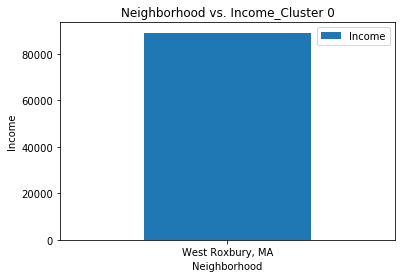

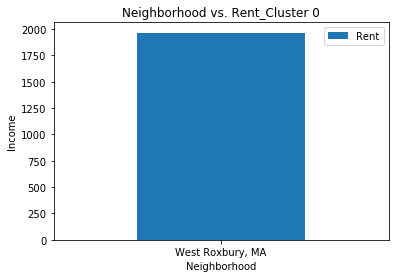

In [366]:
#Make histograms of Cluster_0 Income and Rent info
import matplotlib.pyplot as plt
ax_0 = cl_0_IR.plot.bar(x='Neighborhood', y='Income', rot=0)
plt.ylabel('Income')
plt.title('Neighborhood vs. Income_Cluster 0')
ax_0 = cl_0_IR.plot.bar(x='Neighborhood', y='Rent', rot=0)
plt.ylabel('Income')
plt.title('Neighborhood vs. Rent_Cluster 0')
plt.show

Text(0, 0.5, 'Income')

Text(0.5, 1.0, 'Neighborhood vs. Income_Cluster 1')

Text(0, 0.5, 'Income')

Text(0.5, 1.0, 'Neighborhood vs. Rent_Cluster 1')

<function matplotlib.pyplot.show(*args, **kw)>

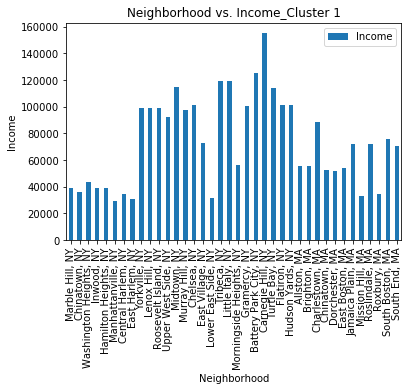

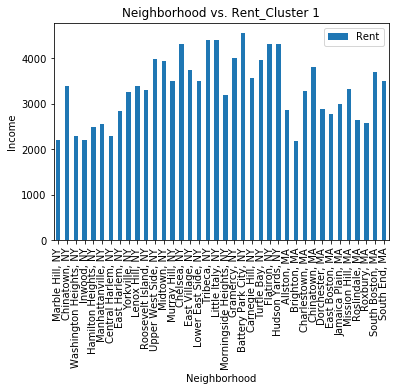

In [359]:
#Make histograms of Cluster_1 Income and Rent info
ax_1 = cl_1_IR.plot.bar(x='Neighborhood', y='Income', rot=90)
plt.ylabel('Income')
plt.title('Neighborhood vs. Income_Cluster 1')
ax_1 = cl_1_IR.plot.bar(x='Neighborhood', y='Rent', rot=90)
plt.ylabel('Income')
plt.title('Neighborhood vs. Rent_Cluster 1')
plt.show

Text(0, 0.5, 'Income')

Text(0.5, 1.0, 'Neighborhood vs. Income_Cluster 2')

Text(0, 0.5, 'Income')

Text(0.5, 1.0, 'Neighborhood vs. Rent_Cluster 2')

<function matplotlib.pyplot.show(*args, **kw)>

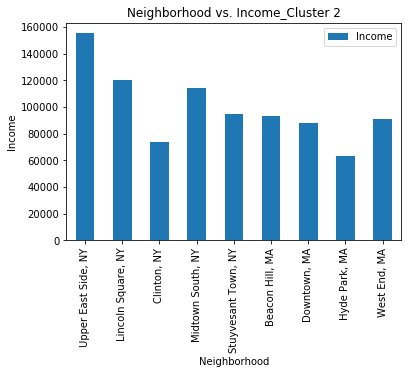

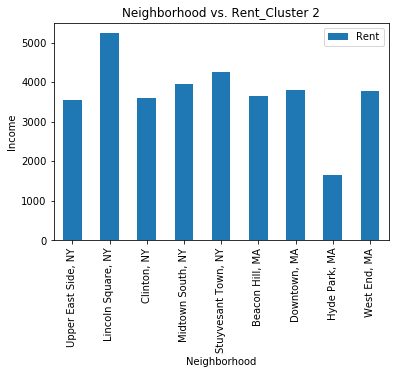

In [360]:
#Make histograms of Cluster_2 Income and Rent info
ax_2 = cl_2_IR.plot.bar(x='Neighborhood', y='Income', rot=90)
plt.ylabel('Income')
plt.title('Neighborhood vs. Income_Cluster 2')
ax_2 = cl_2_IR.plot.bar(x='Neighborhood', y='Rent', rot=90)
plt.ylabel('Income')
plt.title('Neighborhood vs. Rent_Cluster 2')
plt.show

Text(0, 0.5, 'Income')

Text(0.5, 1.0, 'Neighborhood vs. Income_Cluster 3')

Text(0, 0.5, 'Income')

Text(0.5, 1.0, 'Neighborhood vs. Rent_Cluster 3')

<function matplotlib.pyplot.show(*args, **kw)>

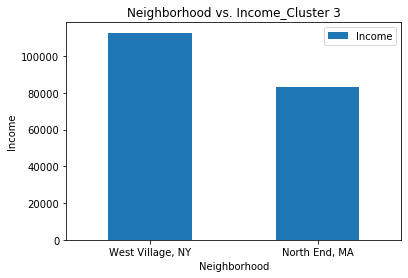

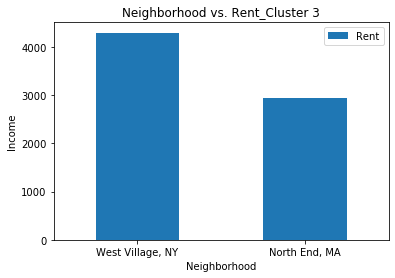

In [361]:
#Make histograms of Cluster_3 Income and Rent info
ax_3 = cl_3_IR.plot.bar(x='Neighborhood', y='Income', rot=0)
plt.ylabel('Income')
plt.title('Neighborhood vs. Income_Cluster 3')
ax_3 = cl_3_IR.plot.bar(x='Neighborhood', y='Rent', rot=0)
plt.ylabel('Income')
plt.title('Neighborhood vs. Rent_Cluster 3')
plt.show

Text(0, 0.5, 'Income')

Text(0.5, 1.0, 'Neighborhood vs. Income_Cluster 4')

Text(0, 0.5, 'Income')

Text(0.5, 1.0, 'Neighborhood vs. Rent_Cluster 4')

<function matplotlib.pyplot.show(*args, **kw)>

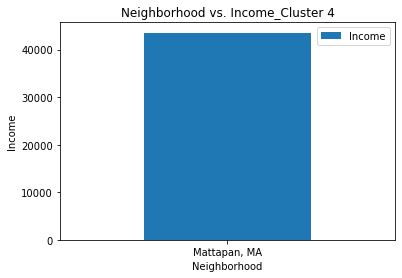

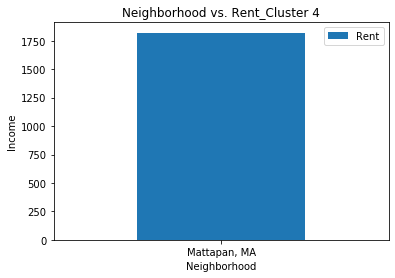

In [362]:
#Make histograms of Cluster_4 Income and Rent info
ax_4 = cl_4_IR.plot.bar(x='Neighborhood', y='Income', rot=0)
plt.ylabel('Income')
plt.title('Neighborhood vs. Income_Cluster 4')
ax_4 = cl_4_IR.plot.bar(x='Neighborhood', y='Rent', rot=0)
plt.ylabel('Income')
plt.title('Neighborhood vs. Rent_Cluster 4')
plt.show

In [390]:
InteractiveShell.ast_node_interactivity = "last_expr"

In [391]:
#Show clusters on map_Boston, MA along with rent and income information in labels
# create map
map_clusters = folium.Map(location=[latitude1, longitude1], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
# add markers to map
for lat, lng, neighborhood, cluster, income, rent in \
zip(comb_merged_IR['Latitude'], comb_merged_IR['Longitude'], comb_merged_IR['Neighborhood'], comb_merged_IR['Cluster Labels'], comb_merged_IR['Income'], comb_merged_IR['Rent']):
    label = '{}, {}, {}, {}'.format(neighborhood, cluster, income, rent)
    label = folium.Popup(label, parse_html=True)
#markers_colors = []
#for lat, lon, poi, cluster, income, rent in zip(comb_merged_IR['Latitude'], comb_merged_IR['Longitude'], comb_merged_IR['Neighborhood'], comb_merged_IR['Cluster Labels'], comb_merged_IR['Income'],comb_merged_IR['Rent'] ):
#    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster)+ 'Med_Income'+ str(income)+ 'Med_Rent'+ str(rent), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [392]:
#Show clusters on map_Manhattan_NY along with rent and income information in labels
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
for lat, lng, neighborhood, cluster, income, rent in \
zip(comb_merged_IR['Latitude'], comb_merged_IR['Longitude'], comb_merged_IR['Neighborhood'], comb_merged_IR['Cluster Labels'], comb_merged_IR['Income'], comb_merged_IR['Rent']):
    label = '{}, {}, {}, {}'.format(neighborhood, cluster, income, rent)
    label = folium.Popup(label, parse_html=True)
#markers_colors = []
#for lat, lon, poi, cluster, income, rent in zip(comb_merged_IR['Latitude'], comb_merged_IR['Longitude'], comb_merged_IR['Neighborhood'], comb_merged_IR['Cluster Labels'], comb_merged_IR['Income'],comb_merged_IR['Rent'] ):
#    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster)+ 'Med_Income'+ str(income)+ 'Med_Rent'+ str(rent), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [393]:
#Show clusters on USA map
# create map
latitude3=37.0902
longitude3=-95.7129
map_clusters = folium.Map(location=[latitude3, longitude3], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
for lat, lng, neighborhood, cluster, income, rent in \
zip(comb_merged_IR['Latitude'], comb_merged_IR['Longitude'], comb_merged_IR['Neighborhood'], comb_merged_IR['Cluster Labels'], comb_merged_IR['Income'], comb_merged_IR['Rent']):
    label = '{}, {}, {}, {}'.format(neighborhood, cluster, income, rent)
    label = folium.Popup(label, parse_html=True)

# add markers to the map
#markers_colors = []
#for lat, lon, poi, cluster in zip(comb_merged['Latitude'], comb_merged['Longitude'], comb_merged['Neighborhood'], comb_merged['Cluster Labels']):
#    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters